# Summary
- Analyzed ~18k comments across posts in March 2025
- That included 355 unique media ids, and 211 unique captions
- Top 5 posts (in terms of comment volume) contributed to 68% of comments and top 10 posts contributed to ~80% of comment volume and 90% of comment volume captured by 40% of posts
- Top 5 posts were media_ids: 18036343751267796, 18059074886050845,18047477606343932, 1125861369584218, 18051403259269591
- Comments on top 5/10 posts were mostly positive/neutral ruling out any negatively impacting posts
- All of top 5 posts garnerned most of its comments within 2-3 days of going live
- 7-9 pm of every day were most active period for the audience
- Comment audience was most active on Mondays/Fridays and least active on Thursdays

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Unique posts and captions

In [2]:
df = pd.read_csv('./engagements.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')
df.head()

,timestamp,media_id,media_caption,comment_text
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️


In [3]:
df['media_id'].nunique()

355

In [4]:
df['media_caption'].nunique()

211

# Post volume analysis

In [5]:
df['media_id'].nunique()

355

In [6]:
top_5_media = df['media_id'].value_counts().nlargest(5).index.tolist()
top_5_media

[18036343751267796,
 18059074886050845,
 18047477606343932,
 1125861369584218,
 18051403259269591]

In [7]:
top_10_media = df['media_id'].value_counts().nlargest(10).index.tolist()
top_10_media

[18036343751267796,
 18059074886050845,
 18047477606343932,
 1125861369584218,
 18051403259269591,
 18038401034240788,
 18056231456512954,
 18074744812747120,
 1125861352917553,
 17872089159294304]

In [8]:
freq = df['media_id'].value_counts()

cum_counts = freq.cumsum()

cum_percentage = cum_counts / freq.sum() * 100
cum_df = pd.DataFrame({
    'media_id': freq.index,
    'count': freq.values,
    'cum_count': cum_counts.values,
    'cum_percentage': cum_percentage.values
})

print(cum_df.loc[4,:])
print(cum_df.loc[9,:])

media_id          1.805140e+16
count             9.820000e+02
cum_count         1.207800e+04
cum_percentage    6.769800e+01
Name: 4, dtype: float64
media_id          1.787209e+16
count             1.170000e+02
cum_count         1.390500e+04
cum_percentage    7.793846e+01
Name: 9, dtype: float64


In [9]:
top_90 = cum_percentage[cum_percentage <= 90]
len(top_90)

39

# Sentiment analysis 

In [10]:
sent_df = df.copy()
sent_df['sentiment_polarity'] = sent_df['comment_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sentiment_by_post = sent_df.groupby(['media_id', 'media_caption']).agg({
    'sentiment_polarity': 'mean',
}).reset_index()
sentiment_by_post[sentiment_by_post.media_id.isin(top_5_media)]['sentiment_polarity'].describe()


count    5.000000
mean     0.026624
std      0.011921
min      0.008899
25%      0.021475
50%      0.028390
75%      0.036198
max      0.038156
Name: sentiment_polarity, dtype: float64

# Post Lifecyle

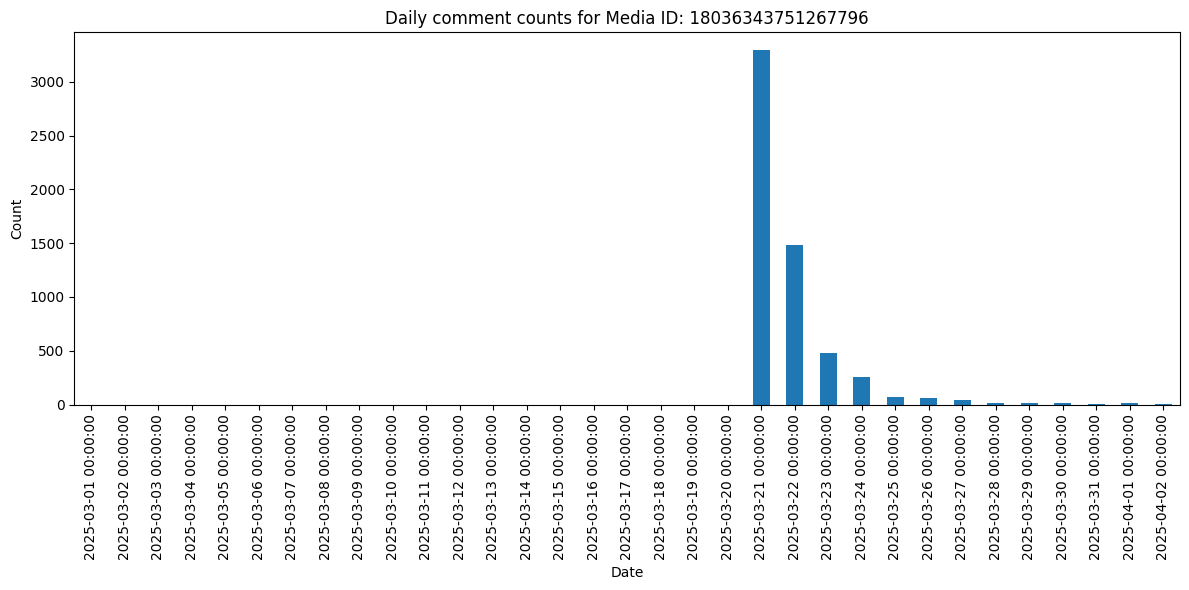

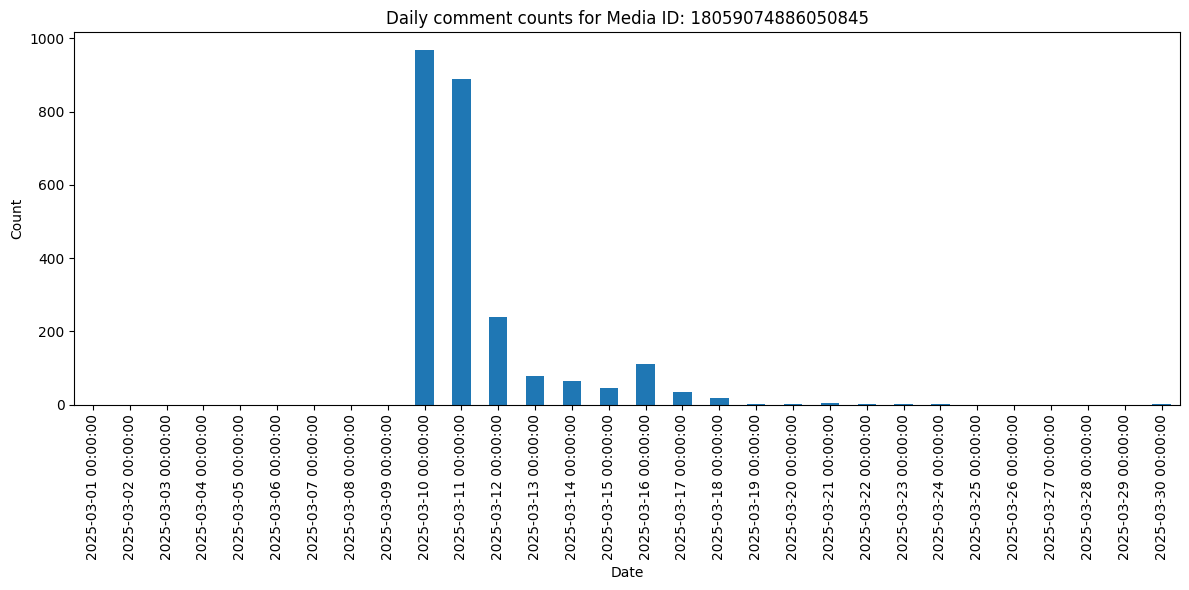

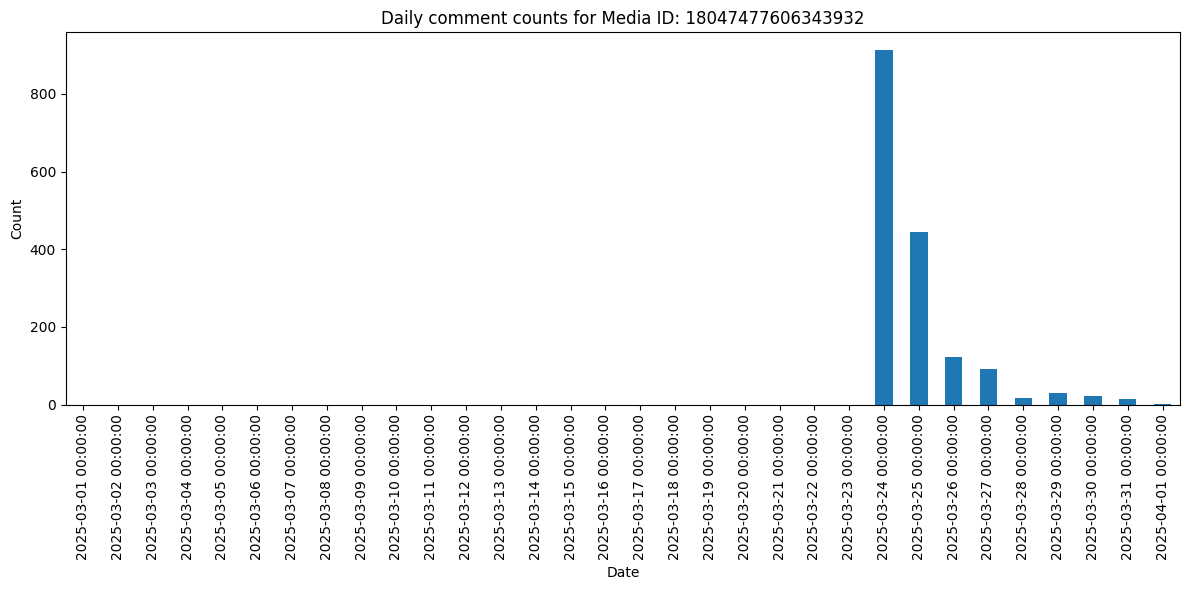

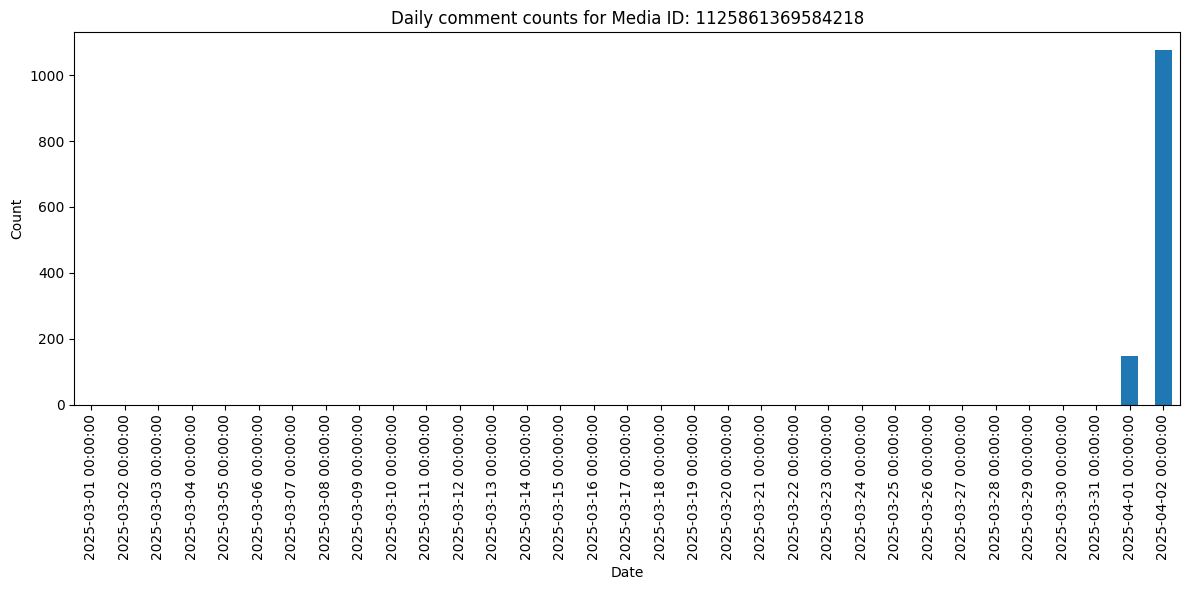

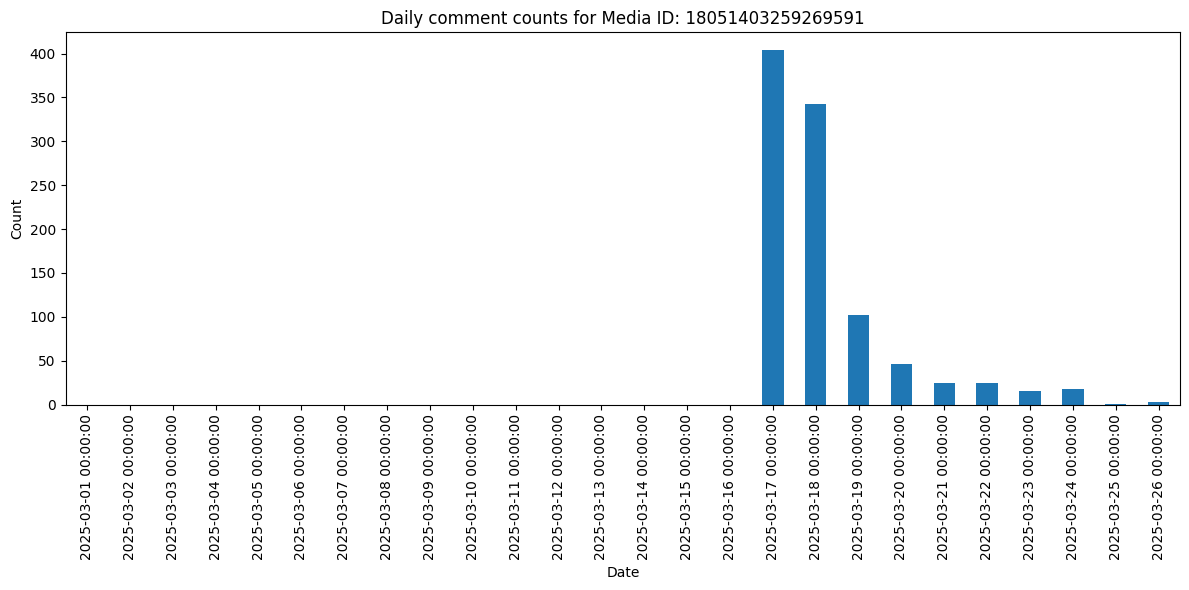

In [11]:
start_date = pd.to_datetime('2025-03-01')  
end_date = pd.to_datetime('2025-04-02')
for media_id in top_5_media:
    filter_df = df[df.media_id == media_id].copy()
    
    # Group by date and count
    daily_counts = filter_df.groupby(filter_df['timestamp'].dt.date).size()
    
    # Convert daily_counts index to datetime for reindexing
    daily_counts.index = pd.to_datetime(daily_counts.index)
    
    # Create a full date range from start_date to the max date present
    full_range = pd.date_range(start=start_date, end=daily_counts.index.max())
    
    # Reindex to full_range and fill missing values with zero
    daily_counts = daily_counts.reindex(full_range, fill_value=0)
    
    # Plot
    plt.figure(figsize=(12, 6))
    daily_counts.plot(kind='bar')
    plt.title(f'Daily comment counts for Media ID: {media_id}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Temporal pattern of engagement

### Daily time series

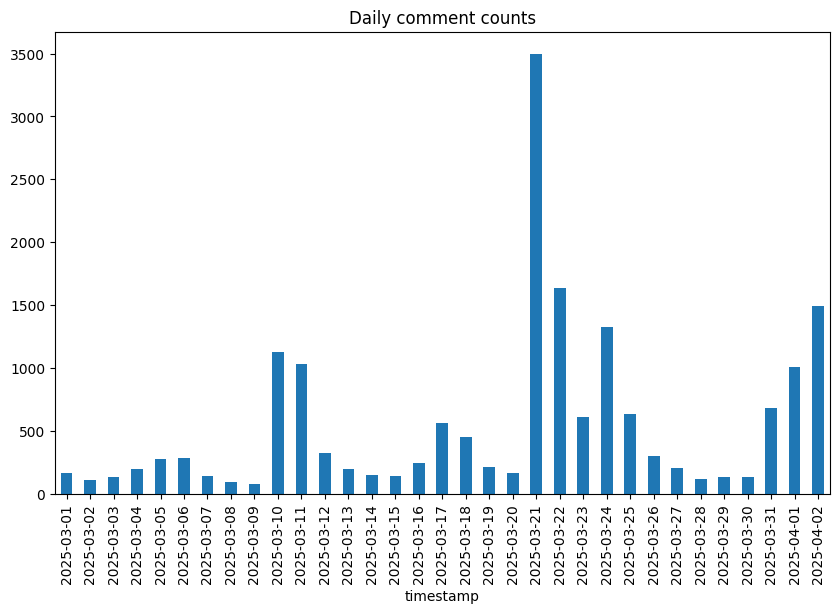

In [12]:
daily_counts = df.groupby(df['timestamp'].dt.date).size()
daily_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Daily comment counts')
plt.show()

### By hour of day

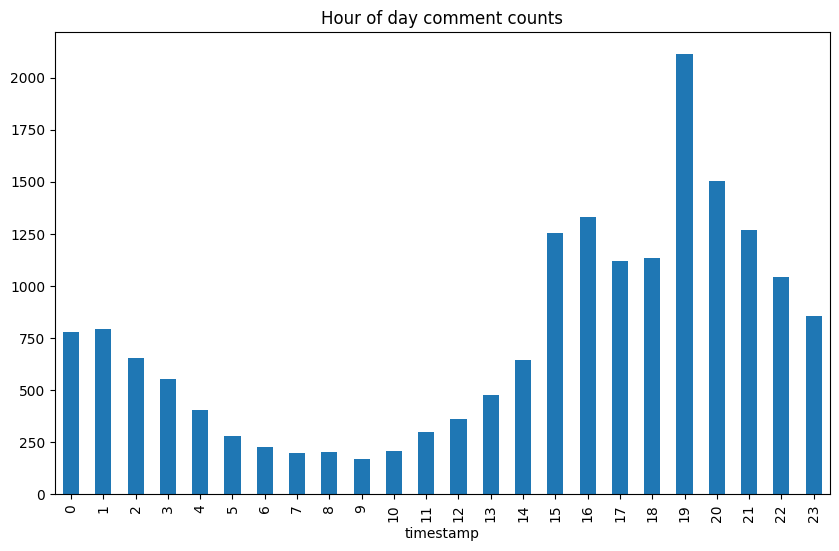

In [13]:
## engagement by hour of day
hourly_counts = df.groupby(df['timestamp'].dt.hour).size()
hourly_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Hour of day comment counts')
plt.show()

#### result: most b/w from 7 -9 pm, more active in evening

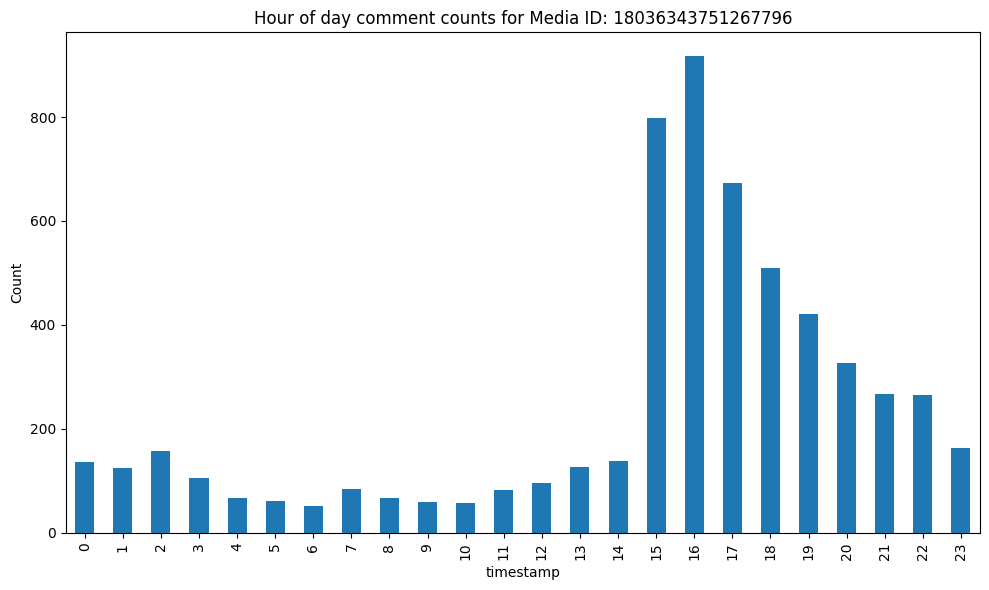

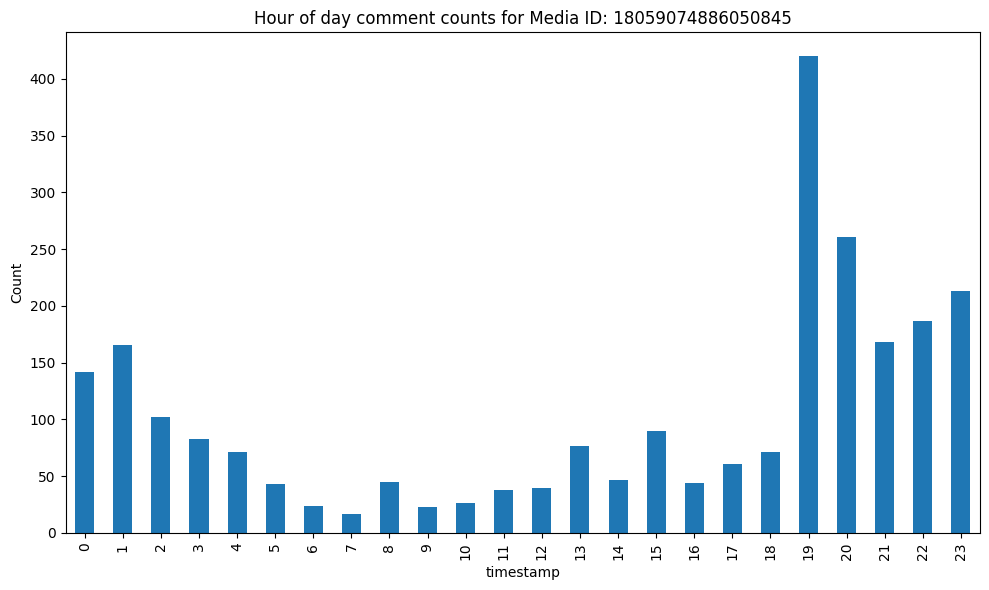

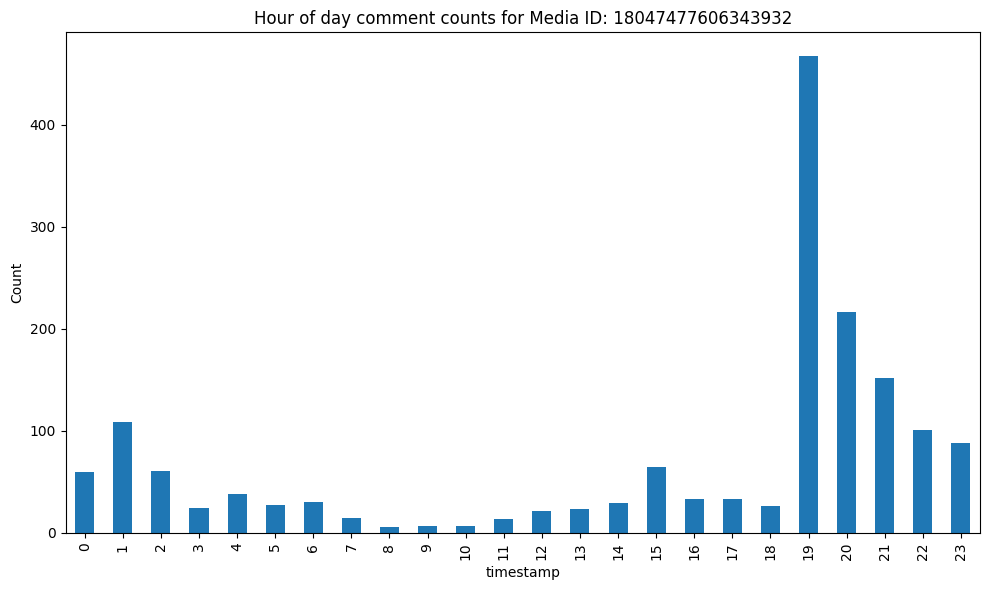

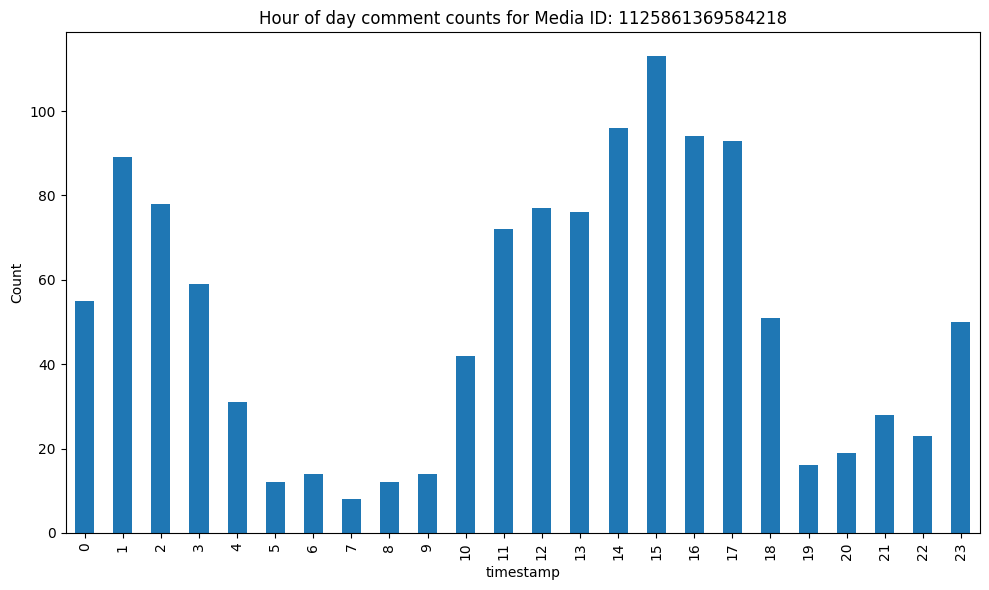

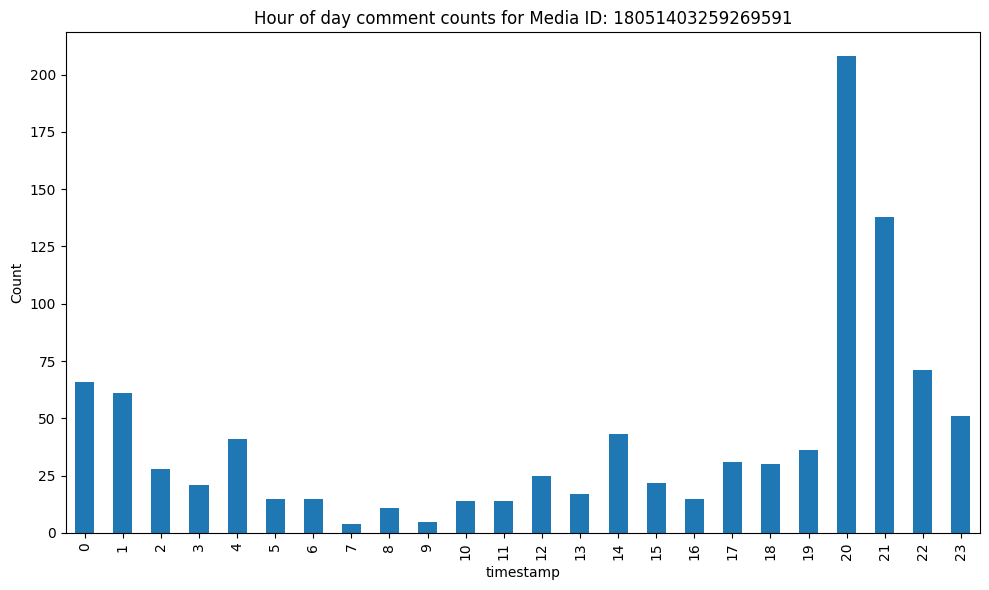

In [14]:
for media_id in top_5_media:
    filtered_df = df[df.media_id==media_id].copy()
    hourly_counts = filtered_df.groupby(filtered_df['timestamp'].dt.hour).size()
    plt.figure(figsize=(10, 6))
    hourly_counts.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Hour of day comment counts for Media ID: {media_id}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


## By day of week

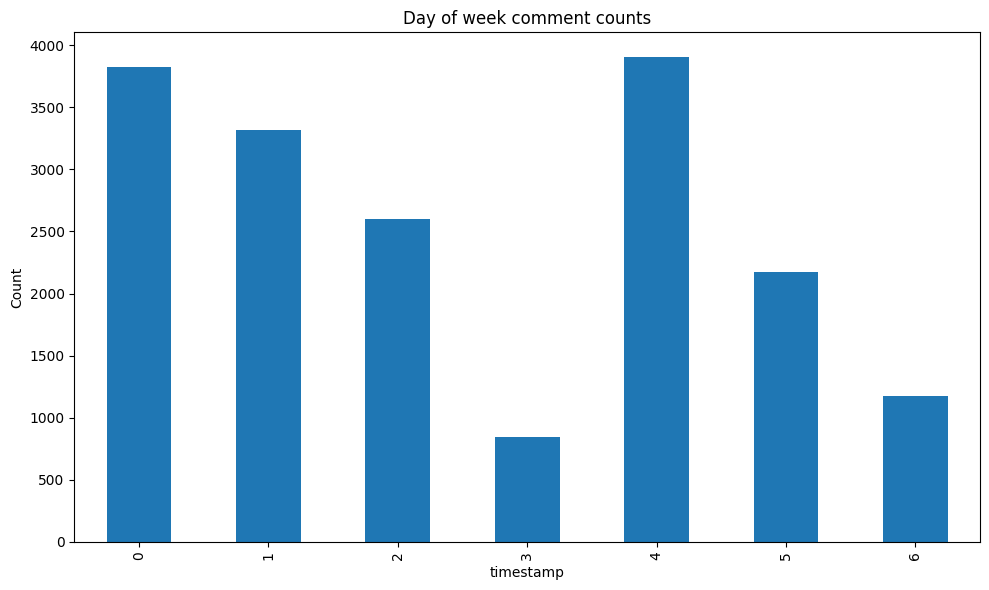

In [15]:
dow_counts = df.groupby(df['timestamp'].dt.dayofweek).size()
dow_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Day of week comment counts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

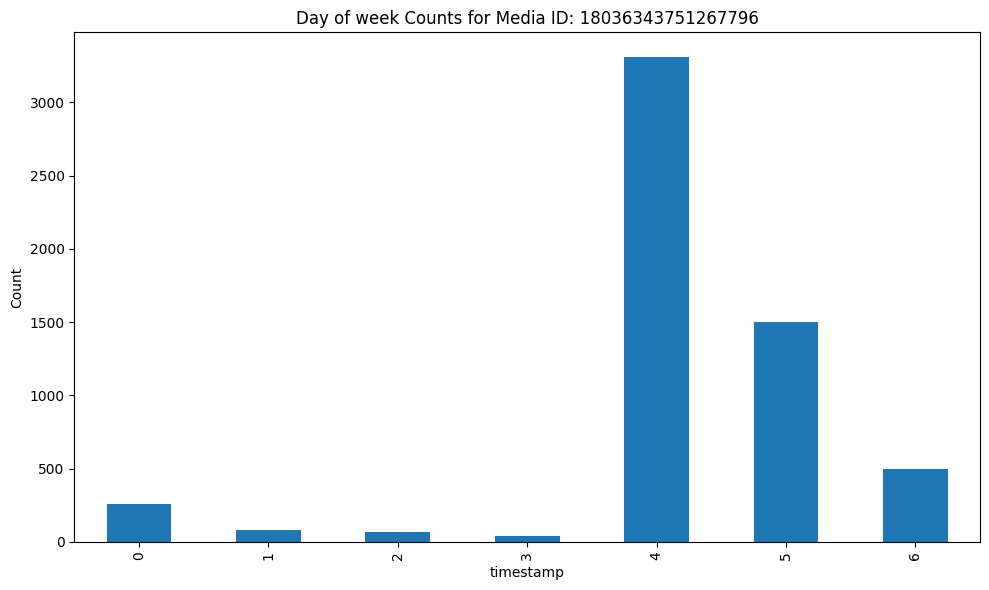

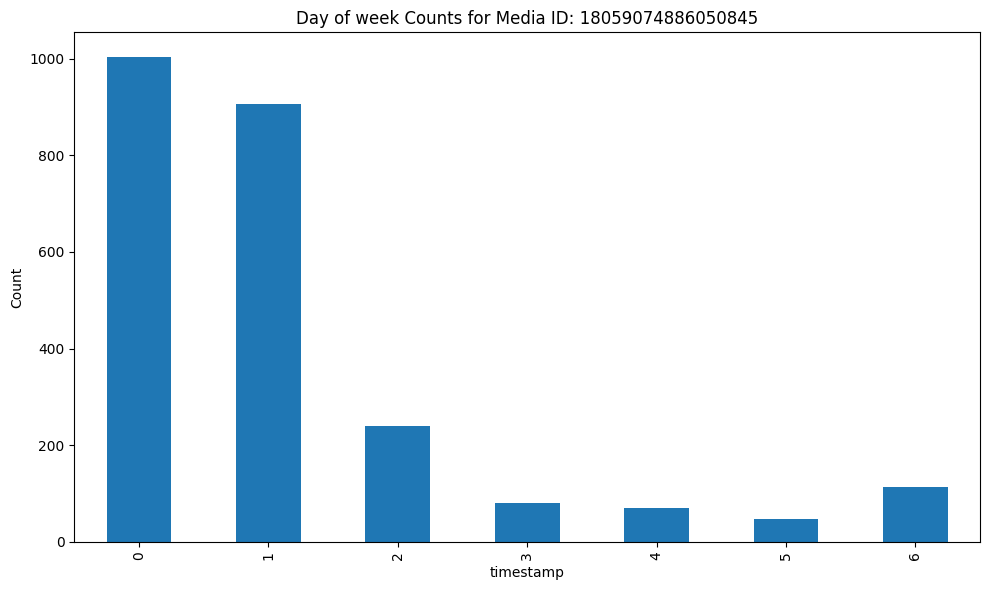

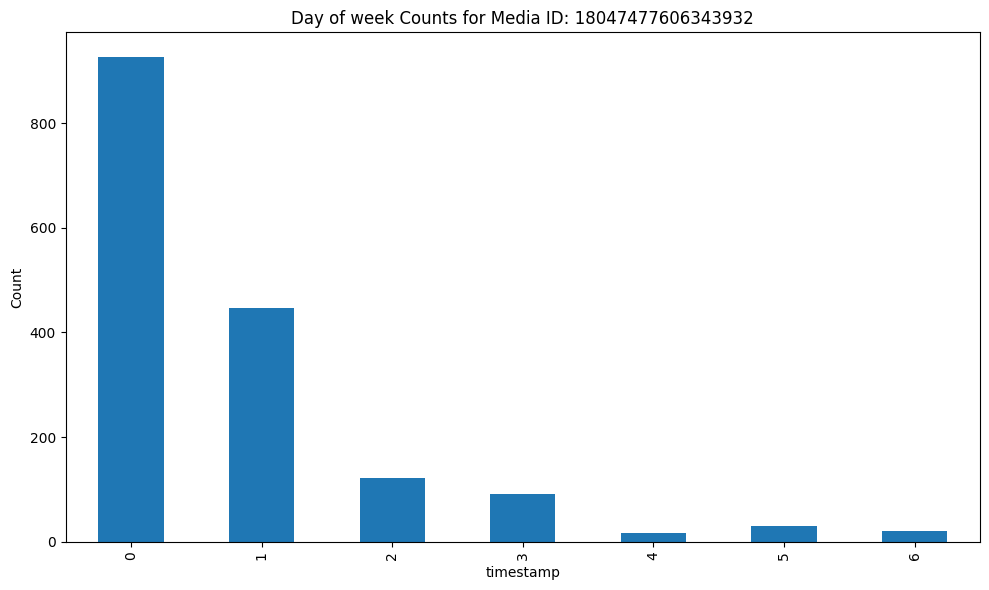

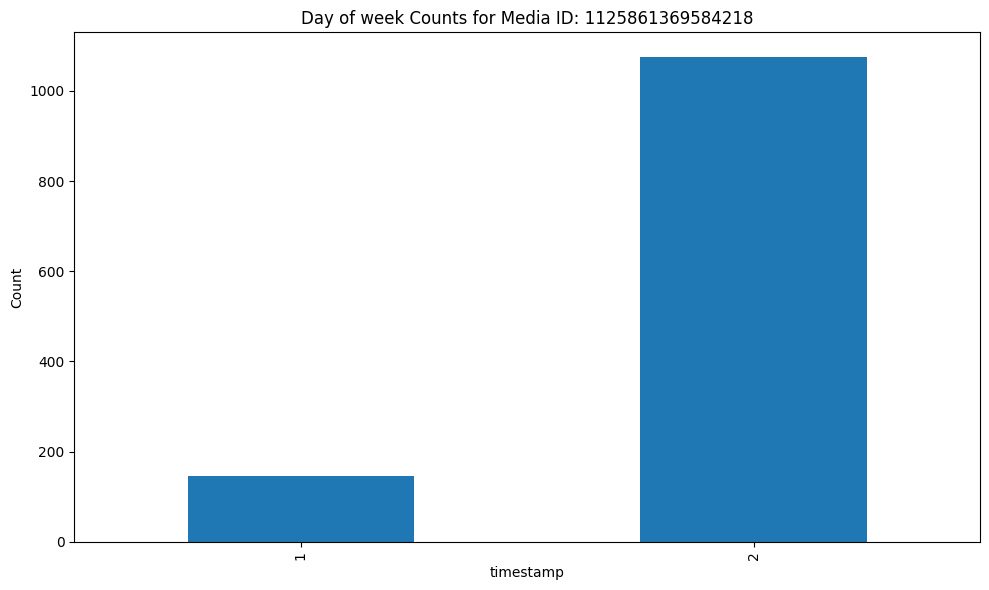

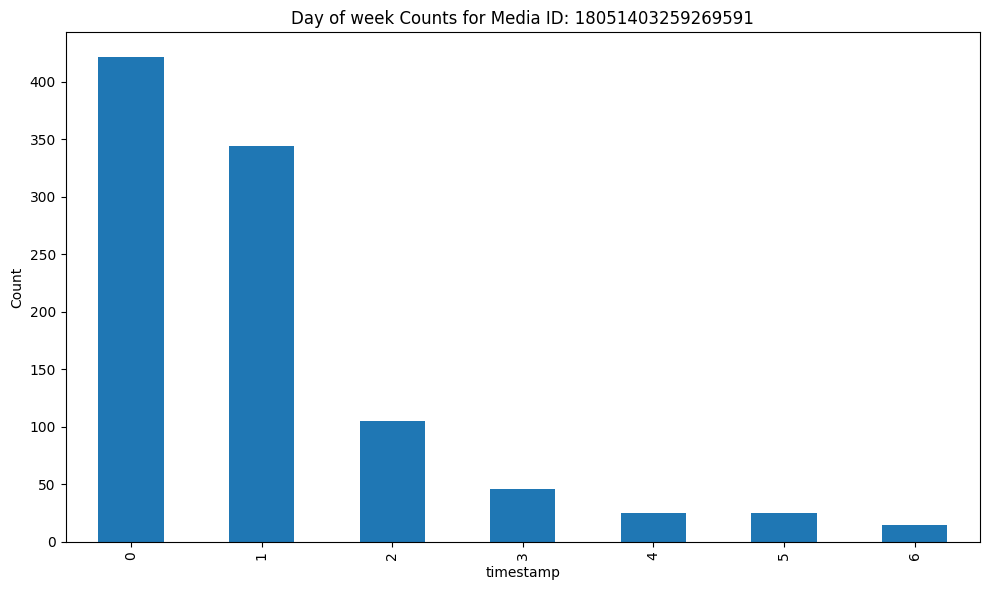

In [16]:
for media_id in top_5_media:
    filtered_df = df[df.media_id==media_id].copy()
    dow_counts = filtered_df.groupby(filtered_df['timestamp'].dt.dayofweek).size()
    plt.figure(figsize=(10, 6))
    dow_counts.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Day of week Counts for Media ID: {media_id}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### result: most active on Monday and least active on Thursday